# Analiza skupa podataka <i> Spam emails </i> 📈

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Ukratko o skupu:
> Kreiran je 1999. godine od strane zaposlenih u kompaniji Hewlett-Packard (skraćeno [HP](https://en.wikipedia.org/wiki/Hewlett-Packard)) u svrhe pravljenja filtera za spam. <br>
> Inicijalno je namenjen za potrebe binarne klasifikacije, odnosno detekcije da li mejl spada u neželjenu poštu ili ne.

In [2]:
# Pošto su informacije o podacima razdvojene u 2 fajla, za dohvatanje atributa koristi se funkcija za parsiranje 
# fajla spambase.names

import os

def parse_attributes(file_path):
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
    except Exception as e:
        print(e)
    
    word_frequencies, chars_frequencies = [], []
    words, chars = [], []
    
    for line in lines[33 : 81]:
        word_frequencies.append(line[0 : line.index(':')])
        words.append(line[0 : line.index(':')][10:])
    
    for line in lines[81 : 87]:
        chars_frequencies.append(line[0 : line.index(':')])
        chars.append(line[0 : line.index(':')][10:])
    
    full_feature_names = word_frequencies + chars_frequencies
    feature_names = words + chars
    
    for line in lines[87 : ]:
        full_feature_names.append(line[0 : line.index(':')])
        feature_names.append(line[0 : line.index(':')])
        
    feature_names += ['class']
    full_feature_names += ['class']
    
    return full_feature_names, feature_names

In [3]:
full_feature_names, feature_names = parse_attributes('../dataset/spambase.names')

print('Atributi datog skupa: ')
_ = list(map(lambda x: print(x), full_feature_names))

Atributi datog skupa: 
word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over
word_freq_remove
word_freq_internet
word_freq_order
word_freq_mail
word_freq_receive
word_freq_will
word_freq_people
word_freq_report
word_freq_addresses
word_freq_free
word_freq_business
word_freq_email
word_freq_you
word_freq_credit
word_freq_your
word_freq_font
word_freq_000
word_freq_money
word_freq_hp
word_freq_hpl
word_freq_george
word_freq_650
word_freq_lab
word_freq_labs
word_freq_telnet
word_freq_857
word_freq_data
word_freq_415
word_freq_85
word_freq_technology
word_freq_1999
word_freq_parts
word_freq_pm
word_freq_direct
word_freq_cs
word_freq_meeting
word_freq_original
word_freq_project
word_freq_re
word_freq_edu
word_freq_table
word_freq_conference
char_freq_;
char_freq_(
char_freq_[
char_freq_!
char_freq_$
char_freq_#
capital_run_length_average
capital_run_length_longest
capital_run_length_total
class


S obzirom da originalna imena atributa možda i nisu na prvi pogled skroz jasna, sledi njihovo objašnjenje i broj svakog tipa atributa koji se pojavljuje:
- 48 atributa kontinualnog tipa u rasponu od 0 do 100 oblika <b><i>word_freq_WORD</i></b>: procenat reči u mejlu koje se poklapaju sa rečju WORD. Reč je u ovom slučaju bilo koji niz alfanumeričkih karaktera terminiran nekim nenumeričkim karakterom ili terminirajućom nulom.
- 6 atributa kontinualnog tipa u rasponu od 0 do 100 oblika <b><i>char_freq_CHAR</i></b>: procenat karaktera u mejlu koji se poklapaju sa karakterom CHAR.
- 1 atribut kontinualnog tipa koji je minimum 1, a gornje ograničenje ne postoji <b><i>capital_run_length_average</i></b>: prosečna dužina sekvence koja se sastoji isključivo od velikih slova.
- 1 atribut kontinualnog tipa koji je minimum 1, a gornje ograničenje ne postoji <b><i>capital_run_length_longest</i></b>: najduža sekvenca koja se sastoji isklučivo od velikih slova.
- 1 atribut kontinualnog tipa koji je minimum 1, a gornje ograničenje ne postoji <b><i>capital_run_length_total</i></b>: ukupan broj velikih slova u mejlu.
- 1 atribut nominalnog tipa koji predstavlja klasu: da li je mejl spam ili ne.

Da bismo lakše baratali atributima, a i imali bolji prikaz na graficima, njihova imena su parsirana na taj način da ostanu samo ključne reči i karakteri, bez prefiksa koji označavaju da se radi o njihovoj frekvenciji.

In [4]:
data = pd.read_csv('../dataset/spambase.data', names= feature_names)
data

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
print('Parsirani atributi:')
_ = list(map(lambda x: print(x), data.columns))

Parsirani atributi:
make
address
all
3d
our
over
remove
internet
order
mail
receive
will
people
report
addresses
free
business
email
you
credit
your
font
000
money
hp
hpl
george
650
lab
labs
telnet
857
data
415
85
technology
1999
parts
pm
direct
cs
meeting
original
project
re
edu
table
conference
;
(
[
!
$
#
capital_run_length_average
capital_run_length_longest
capital_run_length_total
class


In [6]:
data.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Osnovne statistike za date podatke

In [7]:
data.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Raspodele svakog od atributa

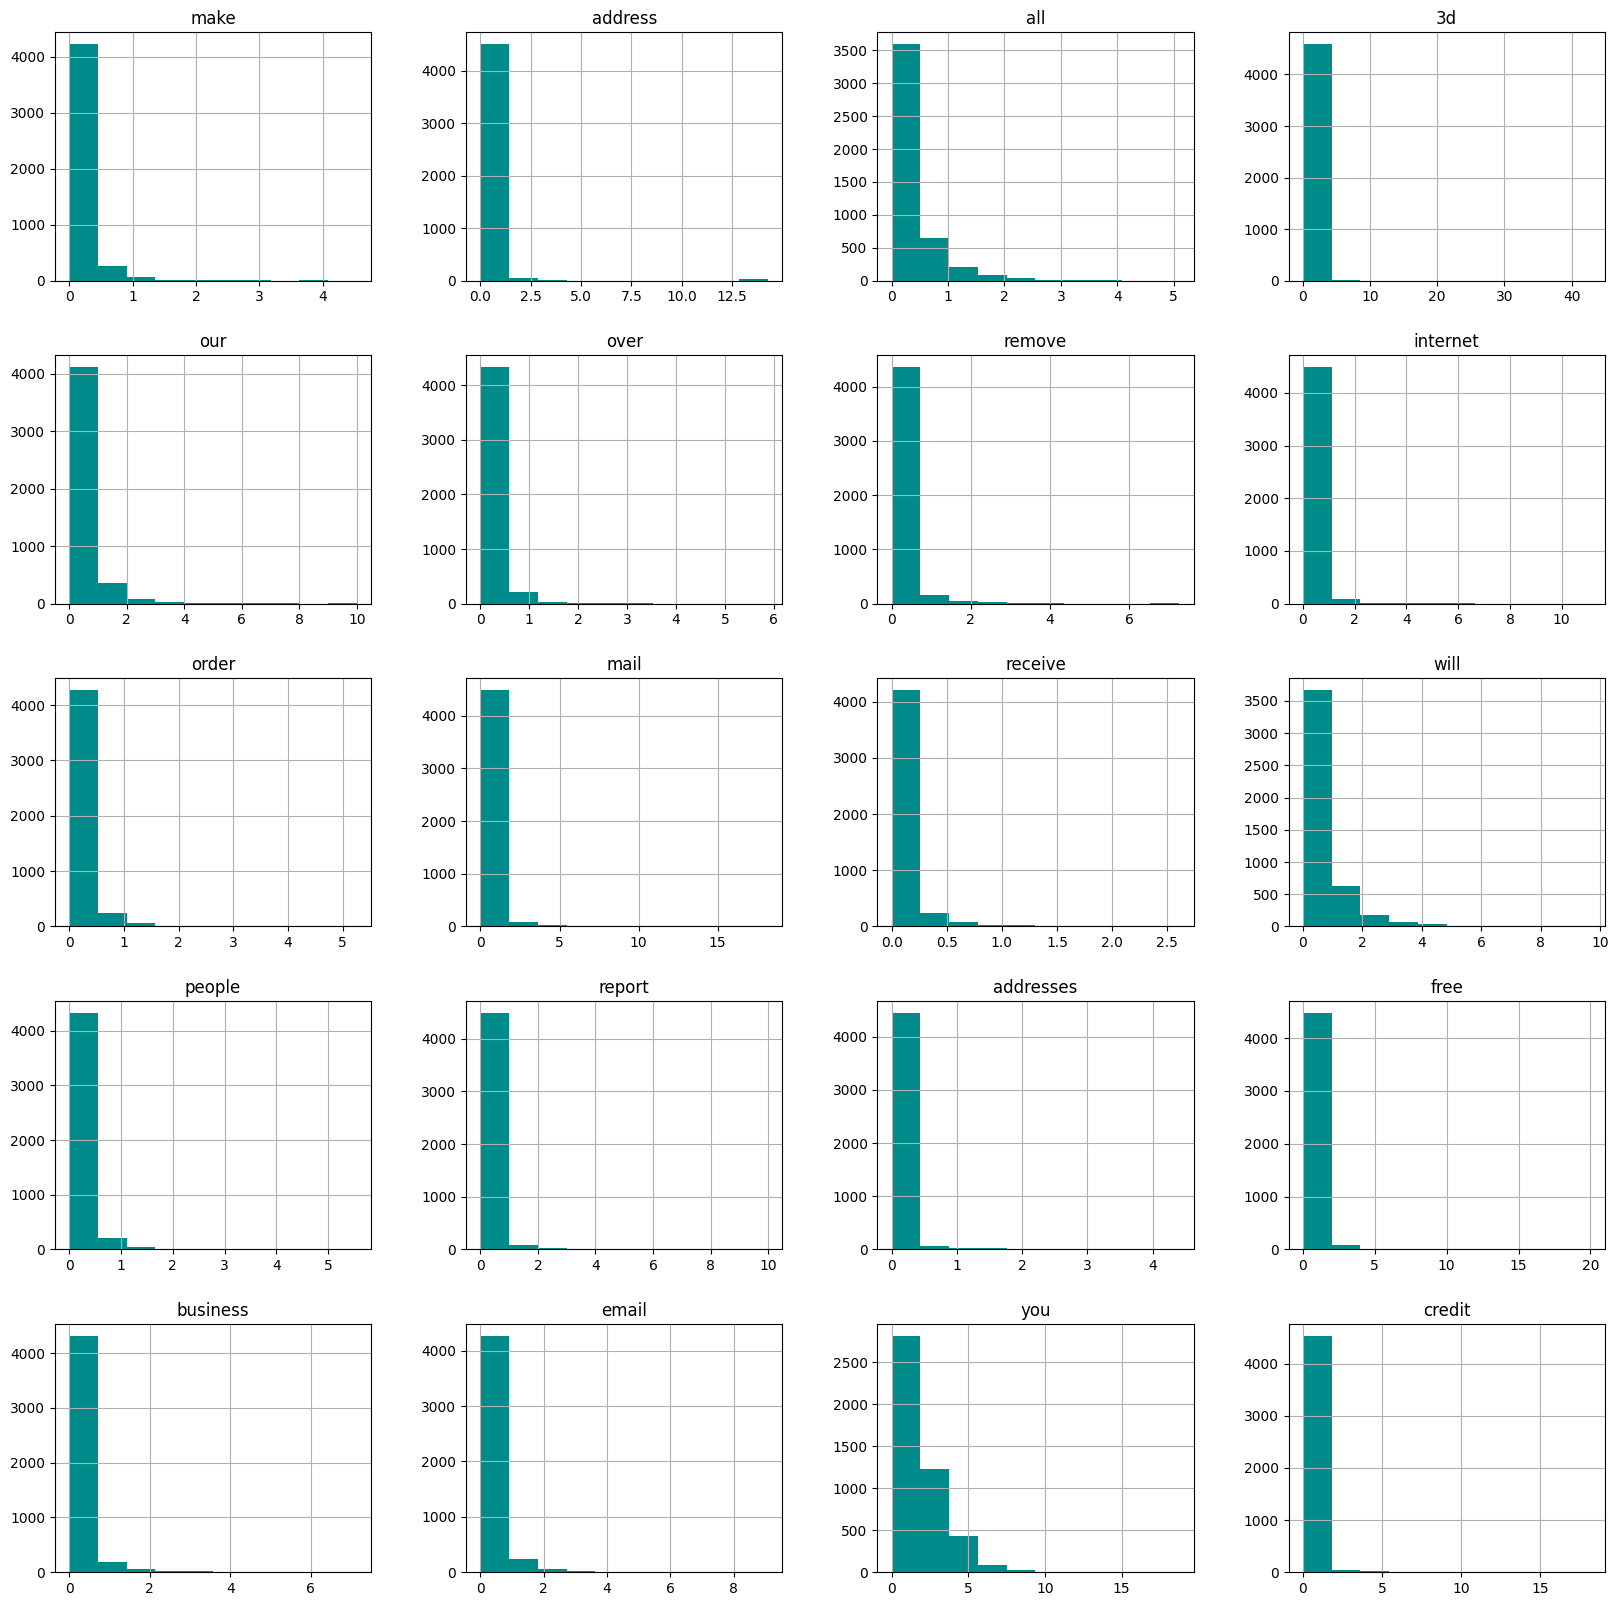

In [8]:
_ = pd.DataFrame.hist(data, column= data.columns[:20], grid= True, figsize= (20, 20), color= 'darkcyan')

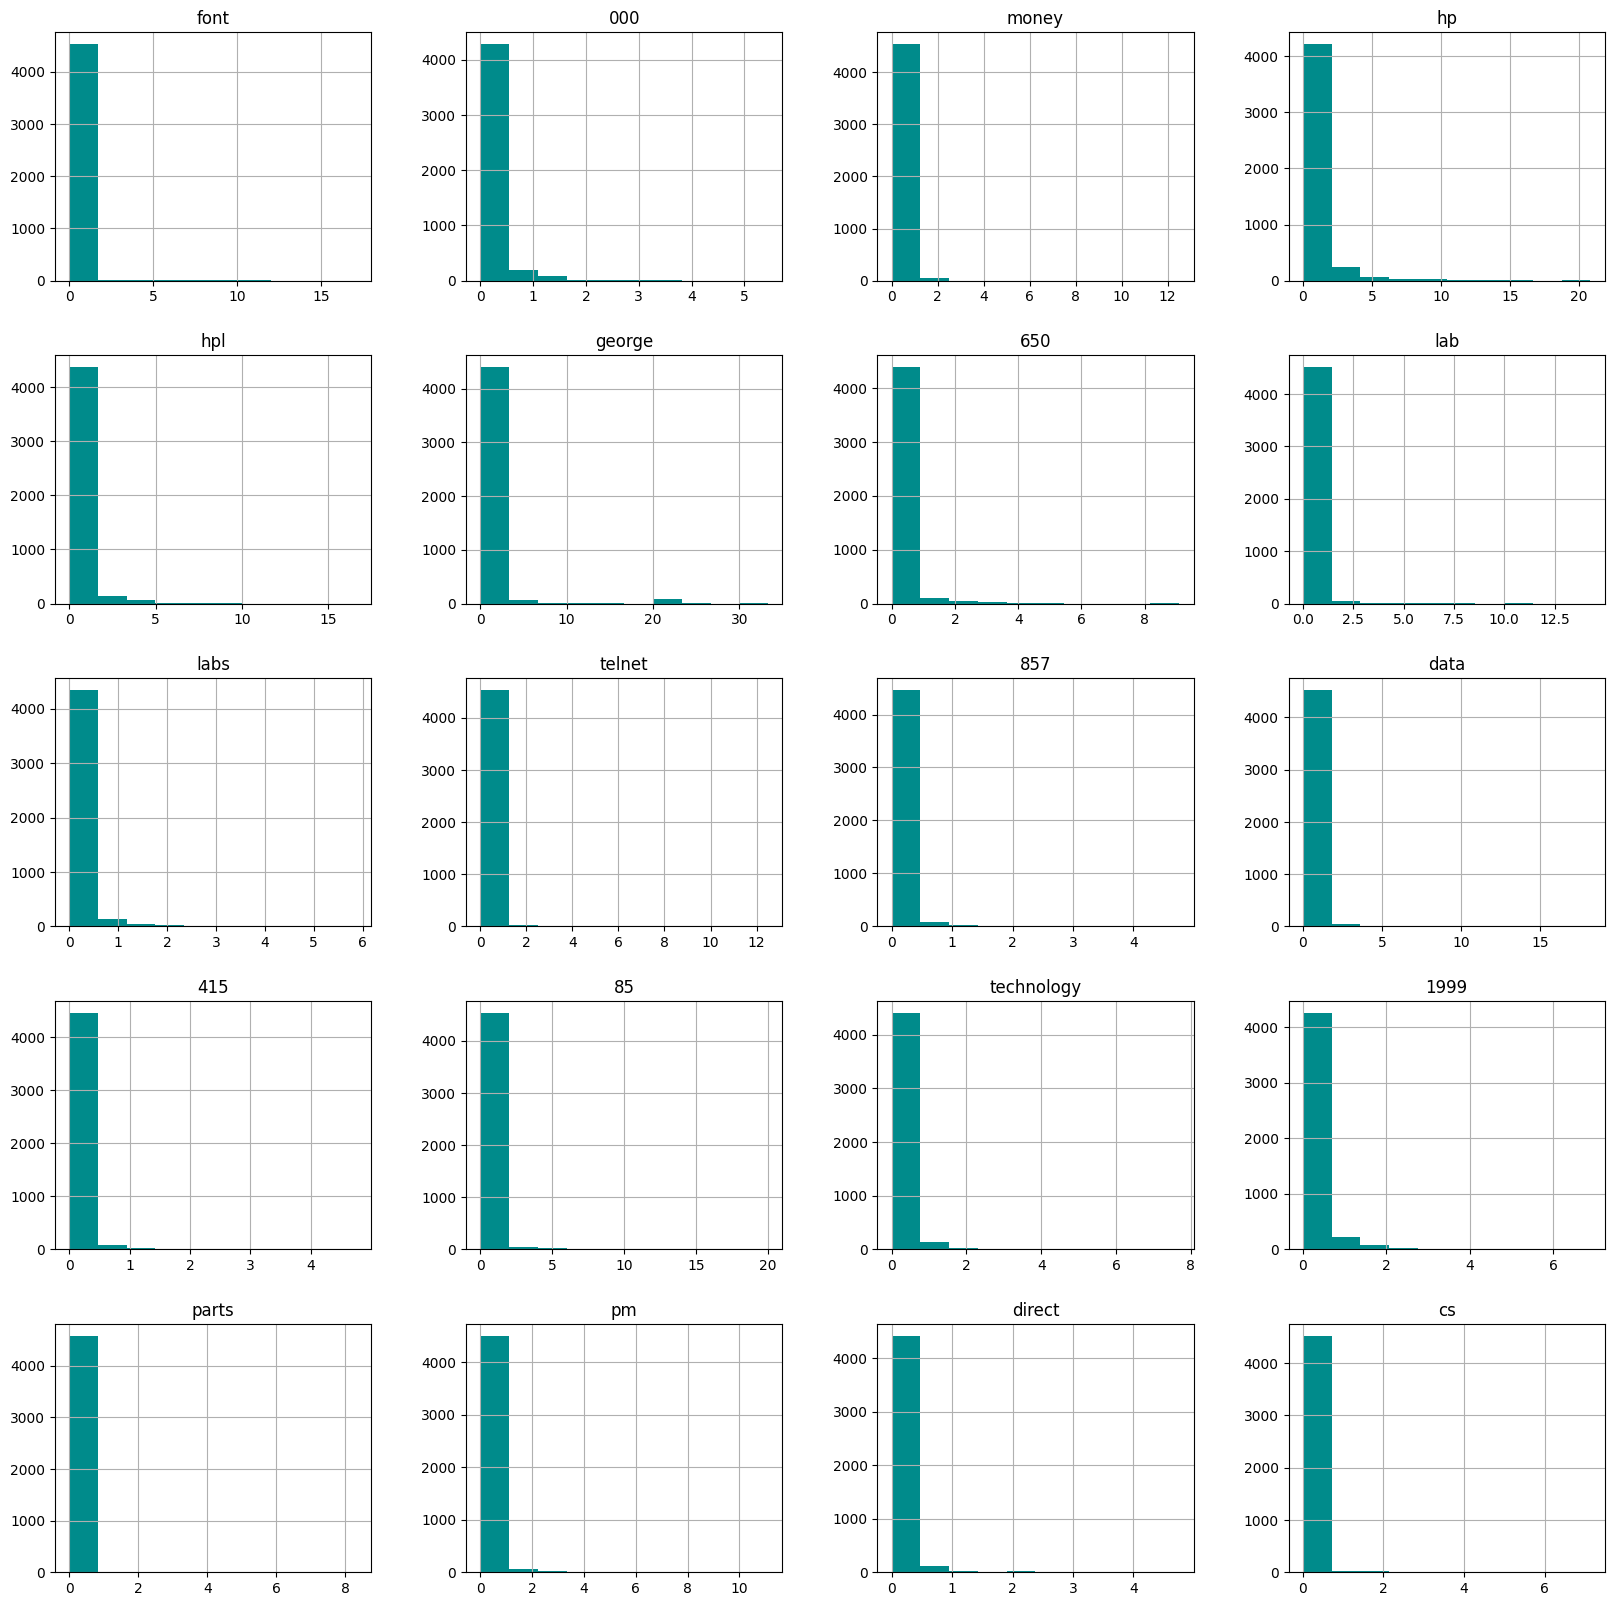

In [9]:
_ = pd.DataFrame.hist(data, column= data.columns[21:41], grid= True, figsize= (20, 20), color= 'darkcyan')

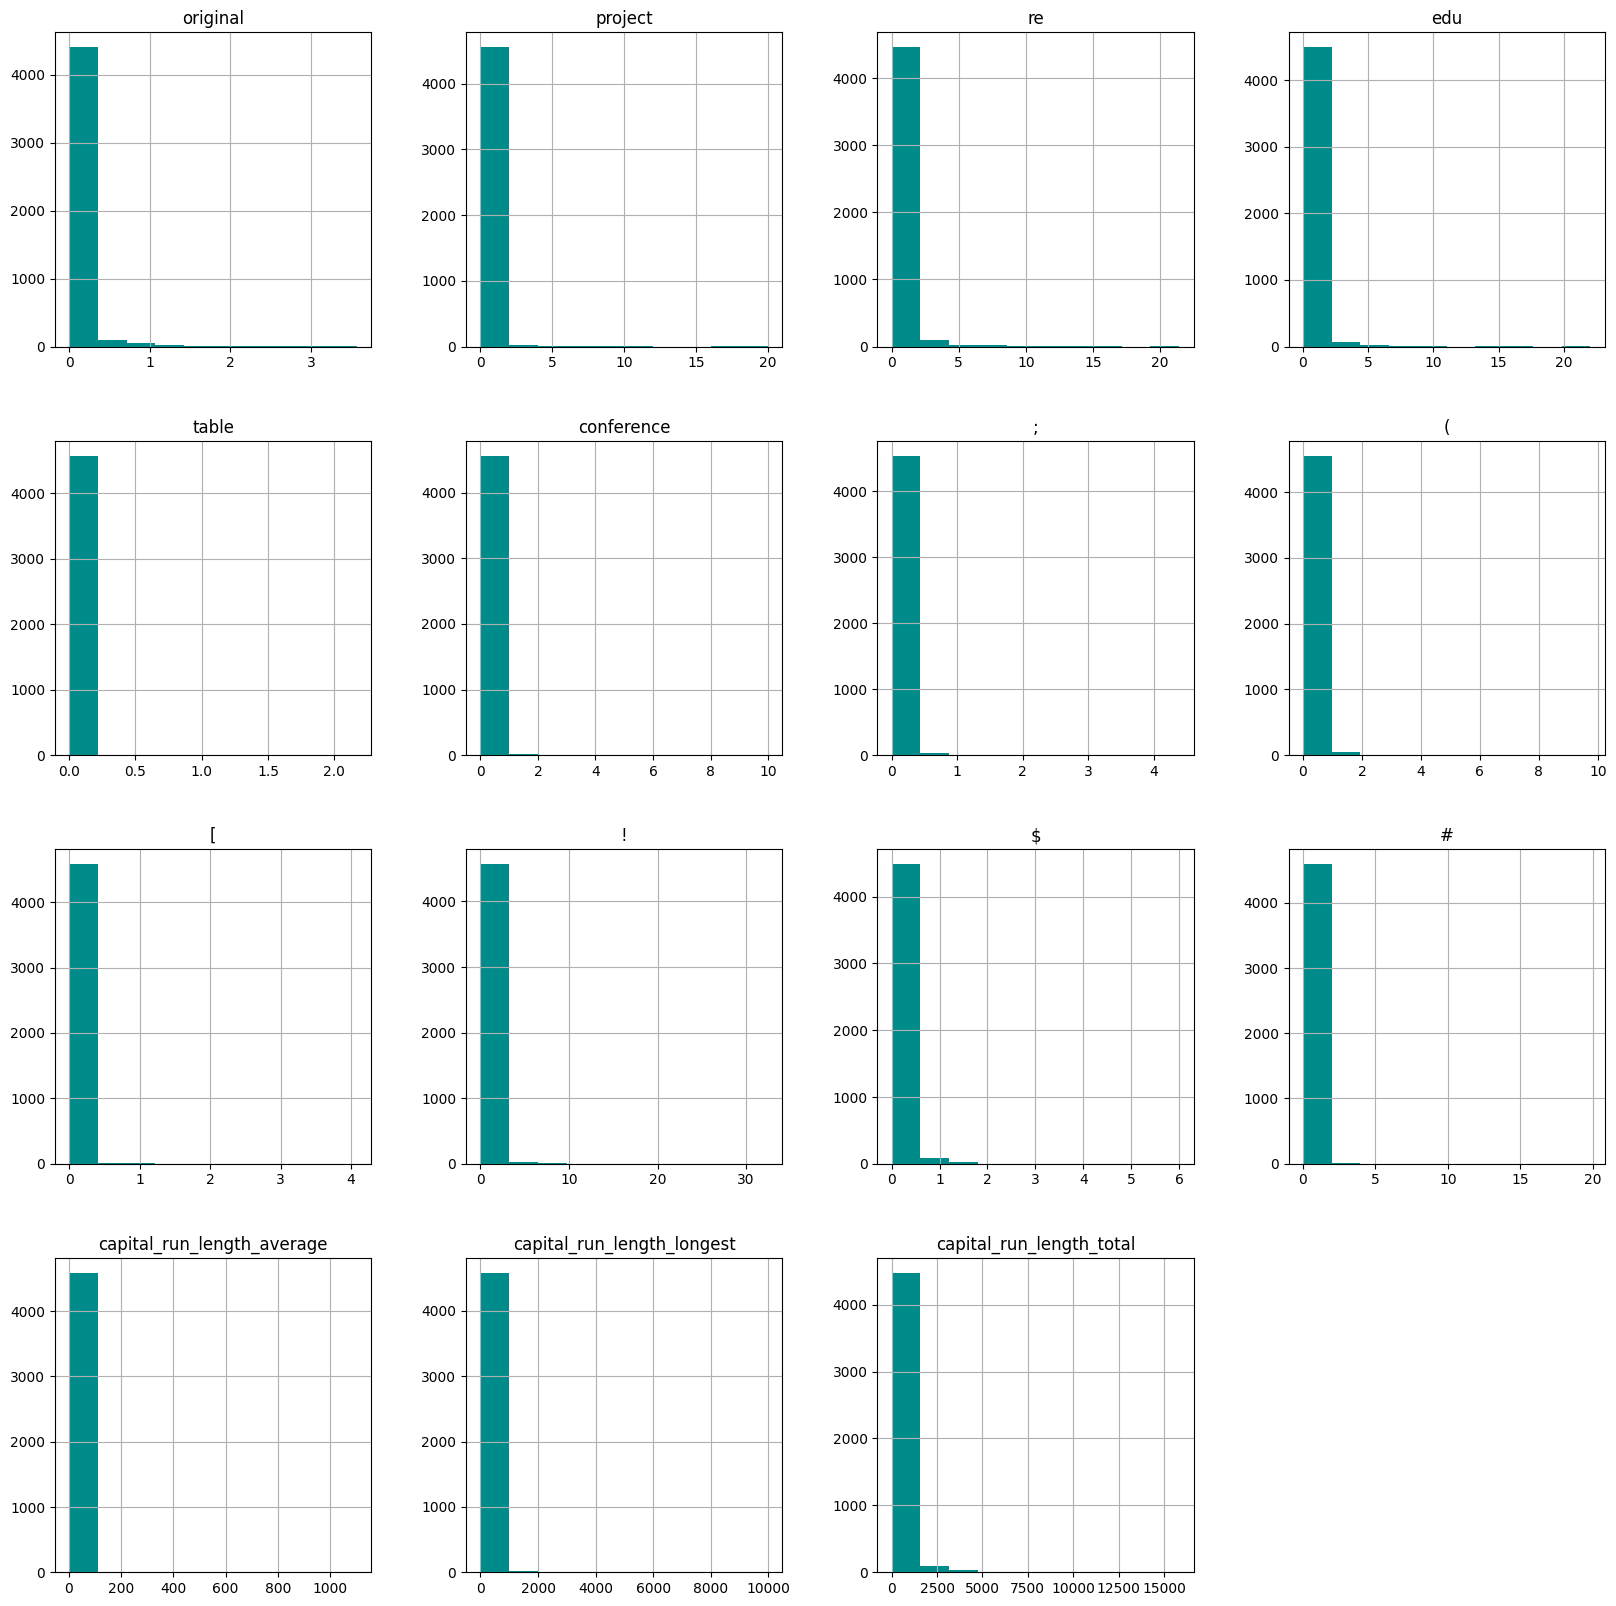

In [10]:
_ = pd.DataFrame.hist(data, column= data.columns[42:57], grid= True, figsize= (20, 20), color= 'darkcyan')

### Nedostajuće vrednosti

In [11]:
data.isna().sum()

make                          0
address                       0
all                           0
3d                            0
our                           0
over                          0
remove                        0
internet                      0
order                         0
mail                          0
receive                       0
will                          0
people                        0
report                        0
addresses                     0
free                          0
business                      0
email                         0
you                           0
credit                        0
your                          0
font                          0
000                           0
money                         0
hp                            0
hpl                           0
george                        0
650                           0
lab                           0
labs                          0
telnet                        0
857     

Primećujemo da skup nema nedostajuće vrednosti ni za jedan od atributa.

In [19]:
sum(data.duplicated())

391

> U skupu podataka imamo 391 duplirani red. Ove redove možemo izbaciti u toku preprocesiranja podataka i ne uzimati ih u obzir prilikom kreiranja modela.

### Matrica korelacije 

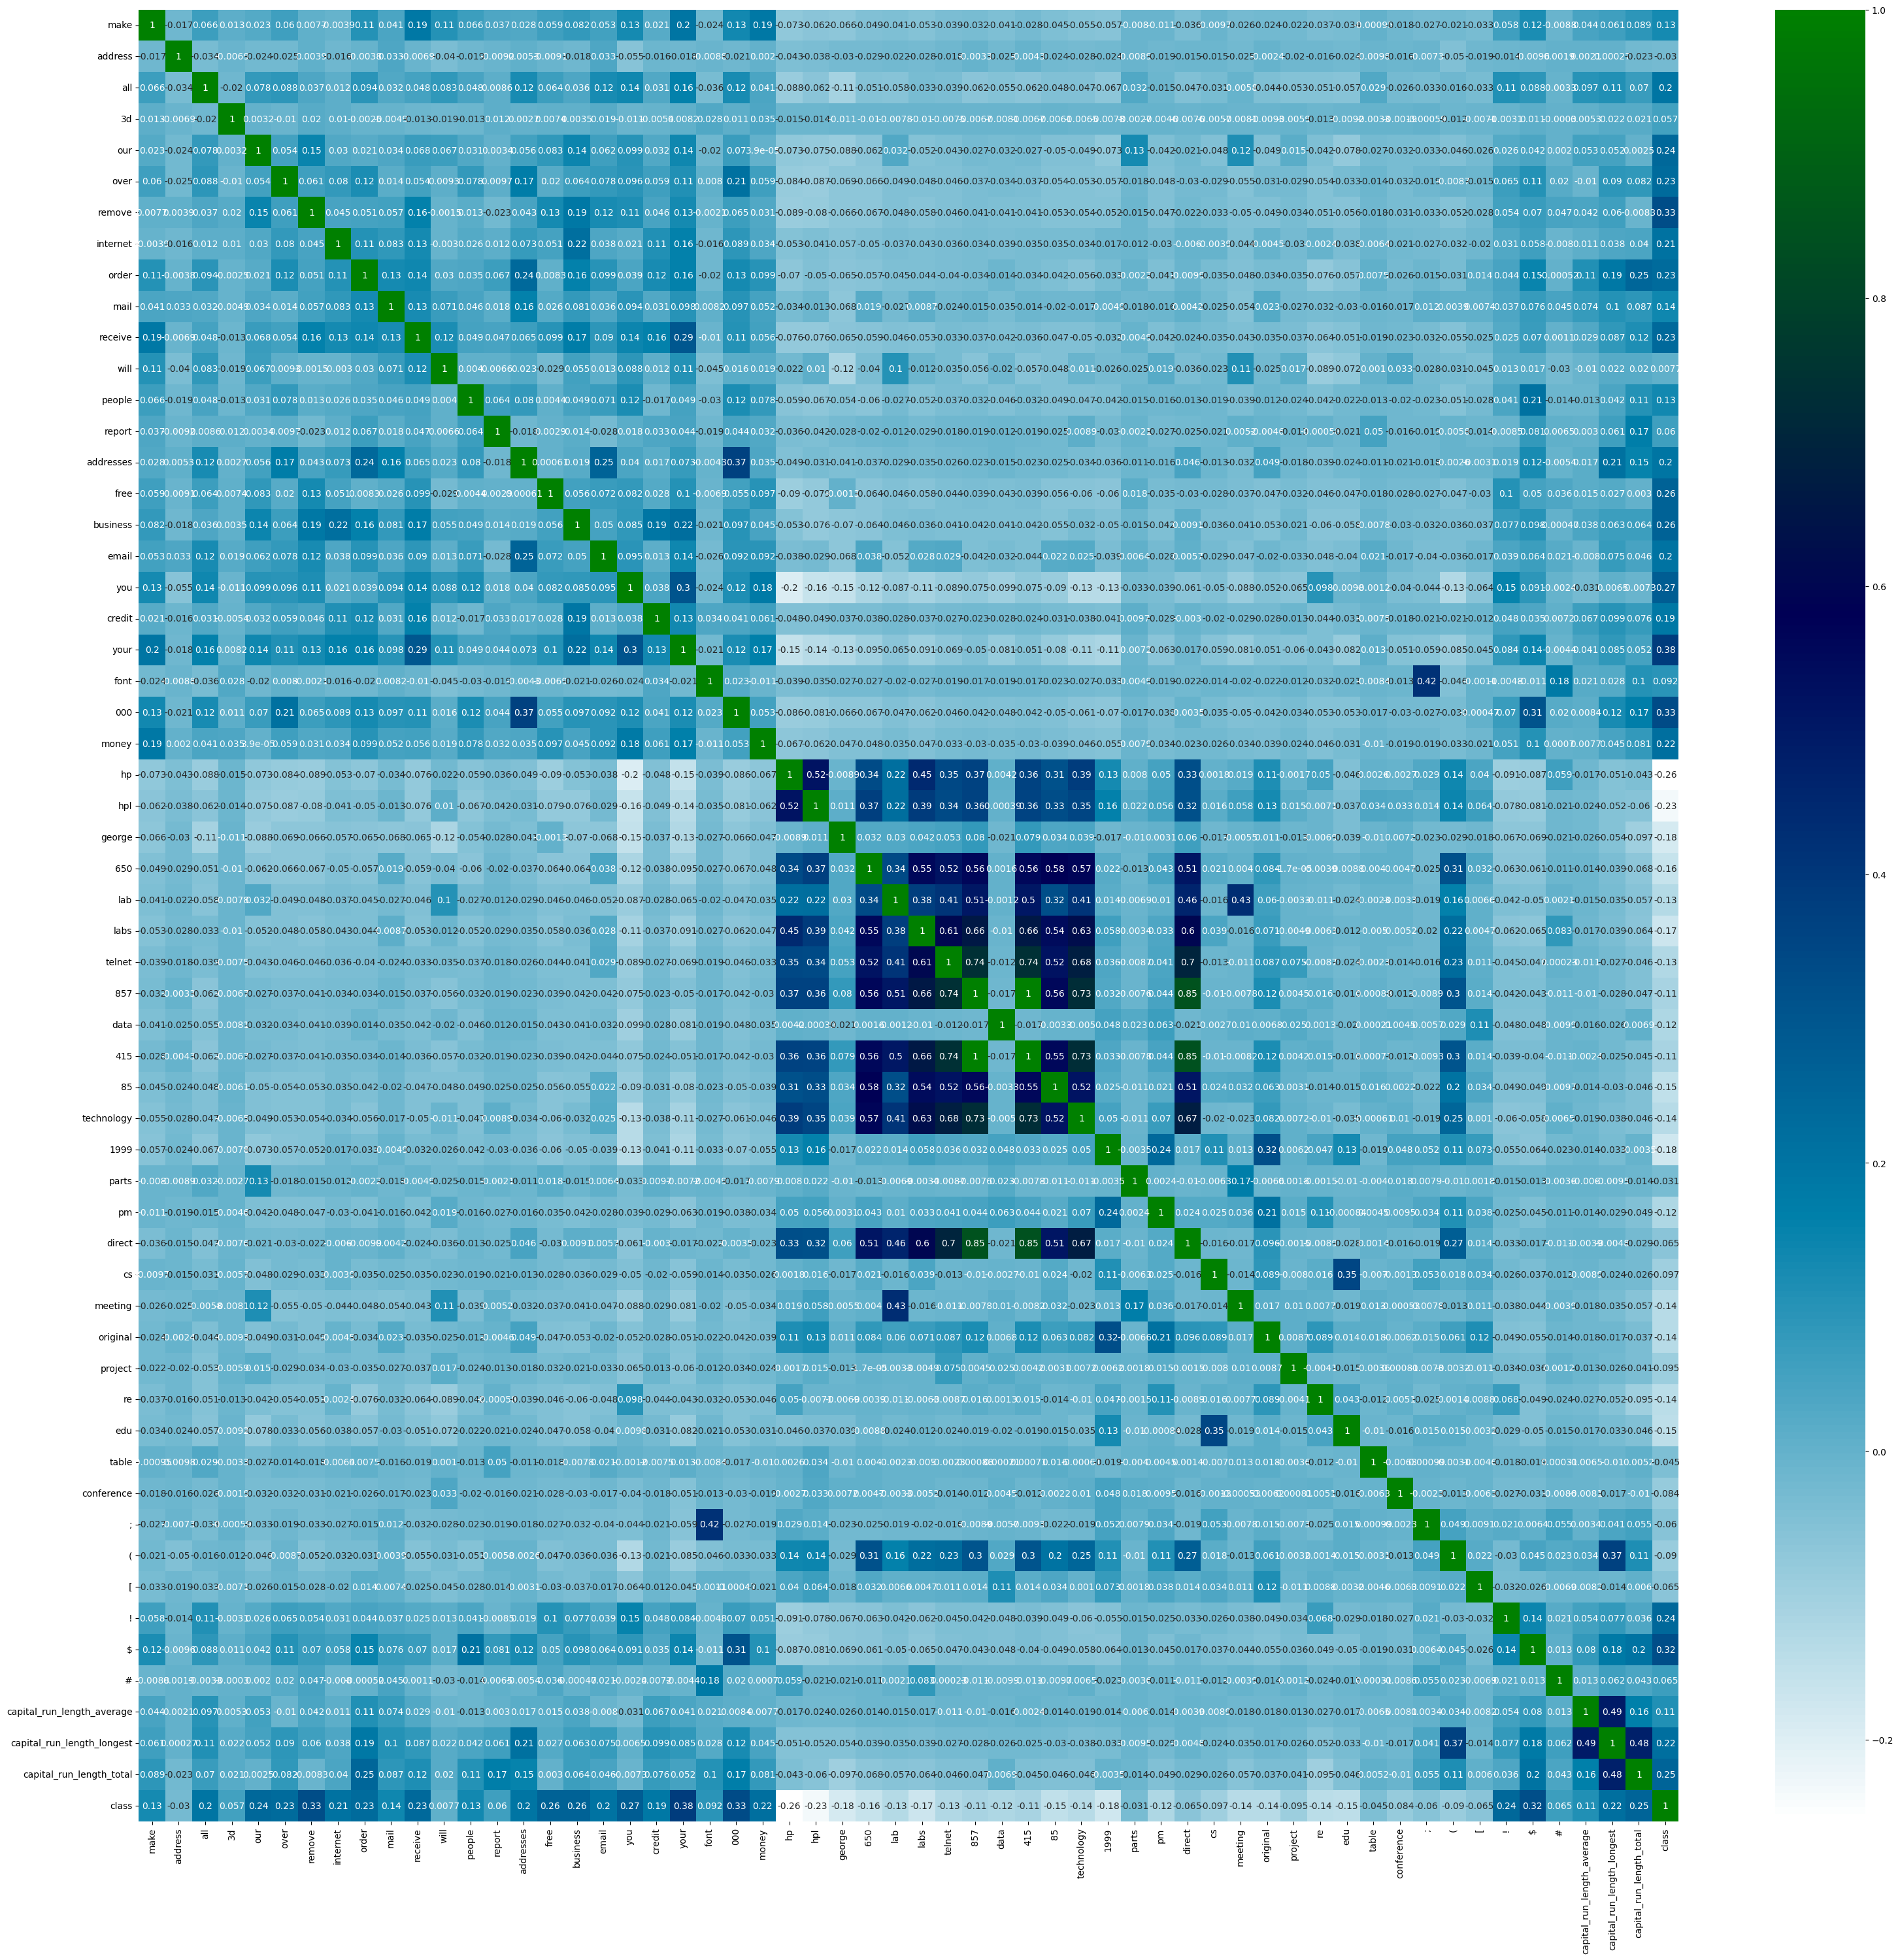

In [14]:
correlation_matrix = data.corr()

# Predstavljeno preko heat mape
plt.figure(figsize = (38, 36))
_ = sns.heatmap(correlation_matrix, annot=True, cmap= plt.cm.ocean_r)

In [15]:
correlation_matrix

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


Matrica korelacije nam može biti od pomoći da neke atribute eliminišemo iz skupa pre primene odgovarajućih algoritama. Ako su atributi jako korelisani (imaju visok koeficijent korelacije, koji se očitava u matrici), možemo smatrati da neće bitno uticati na rezultate pa ih s tim u vidu i izbaciti iz skupa.

### Provera balansiranosti klasa

In [16]:
y = data[['class']]
display(y.replace(to_replace=[0, 1], value= ['Non spam', 'Spam']))

,class
0,Spam
1,Spam
2,Spam
3,Spam
4,Spam
...,...
4596,Non spam
4597,Non spam
4598,Non spam
4599,Non spam


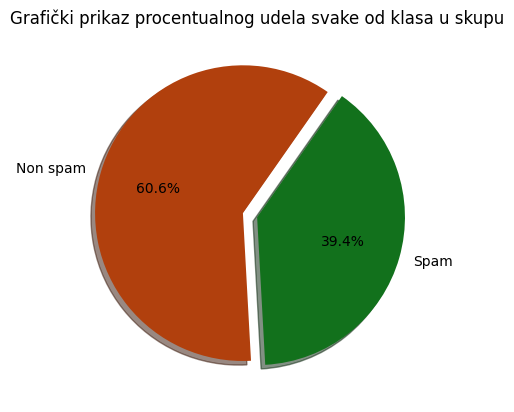

In [17]:
colors = sns.color_palette("dark")[1:3]

plt.pie(y.value_counts(), labels= ['Non spam', 'Spam'], colors= colors, startangle= 55, explode= (0.1, 0.0), 
        shadow= True, autopct= '%.1f%%')
plt.title('Grafički prikaz procentualnog udela svake od klasa u skupu')
plt.show()

Možemo primetiti da postoji <i> nebalansiranost </i> između datih klasa s obzirom da mejlova koji nisu neželjena pošta ima skoro pa duplo više.